In [28]:
 Umax = -16.06 
dUmax = 1.74
 Bmax = -16.43
dBmax = 1.19
 Vmax = -16.89
dVmax = 0.98
 Rmax = -16.96 
dRmax = 1.03
 Imax = -17.38 
dImax = 0.95

In [35]:
from astropy import cosmology
from astropy.cosmology import WMAP9 as cosmo
import numpy as np
import matplotlib.pyplot as plt

In [36]:
z=  np.arange(0.01, 1.21, 0.01)
mu=cosmo.distmod(z)
snpeak=np.array(mu)+Rmax

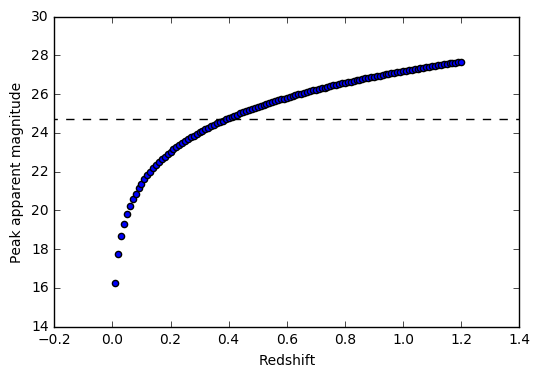

In [108]:
plt.scatter(z,snpeak,)
plt.axhline(y=24.7,xmin=-0.2,xmax=1.2, color='k', linestyle='--')
plt.xlabel('Redshift')
plt.ylabel('Peak apparent magnitude')
plt.show()

In [62]:
mags=[Umax,Bmax,Vmax,Rmax,Imax]
effl=[3633.,4361.,5448.,6407.,7980.]
#from http://www.astro.washington.edu/users/ivezic/Astr511/LSST_SNRdoc.pdf
lsst_effl=[3654.9,4800.3,6222.0,7540.6,8682.1,9916.6]

In [67]:

def value_locate(refx, x):
    """
    VALUE_LOCATE locates the positions of given values within a
    reference array.  The reference array need not be regularly
    spaced.  This is useful for various searching, sorting and
    interpolation algorithms.
    The reference array should be a monotonically increasing or
    decreasing list of values which partition the real numbers.  A
    reference array of NBINS numbers partitions the real number line
    into NBINS+1 regions, like so:
    REF:           X[0]         X[1]   X[2] X[3]     X[NBINS-1]
    <----------|-------------|------|---|----...---|--------------->
    INDICES:  -1           0          1    2       3        NBINS-1
    VALUE_LOCATE returns which partition each of the VALUES falls
    into, according to the figure above.  For example, a value between
    X[1] and X[2] would return a value of 1.  Values below X[0] return
    -1, and above X[NBINS-1] return NBINS-1.  Thus, besides the value
    of -1, the returned INDICES refer to the nearest reference value
    to the left of the requested value.
    
    Example:
    >>> refx = [2, 4, 6, 8, 10]
    >>> x = [-1, 1, 2, 3, 5, 5, 5, 8, 12, 30]
    >>> print value_locate(refx, x)
    array([-1, -1,  0,  0,  1,  1,  1,  3,  4,  4])
    
    
    This implementation is likely no the most efficient one, as there is
    a loop over all x, which will in practice be long. As long as x is
    shorter than 1e6 or so elements, it should still be fast (~sec).
    
    
    """
    #print "TODO: check if refx is monotonically increasing."
    
    refx = np.array(refx)
    x = np.array(x)
    loc = np.zeros(len(x), dtype='int')
    
    for i in xrange(len(x)):
        ix = x[i]
        ind = ((refx - ix) <= 0).nonzero()[0]
        if len(ind) == 0:
            loc[i] = -1
        else: loc[i] = ind[-1]
    
    return loc

In [112]:
npoints=len(effl)
npt=npoints-1
ieff = value_locate(effl, lsst_effl)
print(ieff)
#ieff2=( ieff < np and ieff > 0).nonzero()
#print(ieff2[0])
#ieff3=(ieff2[0]).nonzero()
#print(ieff3[0])

where(ieff > 0,0,ieff)

[0 1 2 3 4 4]


NameError: name 'where' is not defined

In [101]:
where(a GE 5.5)	



 g = where( (ieff LT npt) and (ieff GE 0), Ngood)
 if Ngood GT 0 then begin
      neff = ieff[g]
      x0 = double(xarr[neff])
      diff =  x[g] - x0
      ieff[g] = neff +  diff / (xarr[neff+1] - x0 ) 
 endif
     
 ieff = ieff > 0.0

    
    

SyntaxError: invalid syntax (<ipython-input-101-42b265f23e97>, line 1)